# Credit Card Data Analysis and Classification using Logistic Regression

This program processes Credit card transaction data and classifies whether a given transaction is fradulent or normal using Logistic Regression. We use Tensorflow to implement Logistic Regression.

**Dataset**

The dataset is a standard dataset taken from internet. It is available on Kaggle and can also be downloaded from various Machine learning blogs etc.

source: https://www.kaggle.com/dalpozz/creditcardfraud 
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost- senstivelearning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Citation: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

In [7]:
#import required modules

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
# It is to be noted that the csv file itself is not saved in the repository because of it's large size.
# It can however be downloaded from the source given above

data = pd.read_csv('creditcard.csv', sep=',');

In [19]:
data.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [110]:
# convert into numpy array
data = data.values

In [111]:
# separate features and labels
Features, labels = data[:, 0:30], data[:, 30:]

In [112]:
# Feature Normalization
mu = np.mean(Features, axis=0)
sigma = np.std(Features, axis=0)

Features = (Features - mu) / sigma

In [113]:
m, n = Features.shape
print(m, n)

284807 30


In [114]:
# Add Bias vector (intercept terms) which is a vector with all 1's
Features = np.hstack((np.ones((m,1)), Features))

In [116]:
# Split the data into training set and test set
# 30% of data is separated as test set which is used to compute predictions and model behaviour
X_train, X_test, y_train, y_test = model_selection.train_test_split(Features, labels, test_size=0.3, random_state=42)

m_train, n_train = X_train.shape
m_test, n_test = X_test.shape

In [117]:
print(X_train.shape)
print(X_test.shape)

(199364, 31)
(85443, 31)


In [118]:
# Logistic Regression hypothesis function

def sigmoid(z):
    return np.exp(z) / (1 + np.exp(z));

In [133]:
# Tensorflow parameters
alpha = 0.1 # learning rate
num_epochs = 500 # no of times complete dataset is iterated

In [134]:
# specify variable data types
X = tf.placeholder(tf.float32, [m_train, n_train])
y = tf.placeholder(tf.float32, [m_train, 1])

# output parameters that fit the model
theta = tf.Variable(tf.zeros([n_train, 1]))

feed_dict = {X:X_train, y:y_train}

In [135]:
init = tf.global_variables_initializer()

In [136]:
# prediction hypothesis is the Sigmoid function h(x) = e^(x) / (1 + e^(x));

hypothesis = tf.sigmoid(tf.matmul(X, theta));

In [137]:
# Cost function for Logistic Regression

cost = tf.reduce_sum((-1 * np.multiply(y, tf.log(hypothesis))) - np.multiply((1 - y), tf.log(1 - hypothesis))) / m_train;

In [138]:
# Initialize optimizer
training_step = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

In [139]:
error = np.empty(shape=[1], dtype=float)  # we will be appending cost/error of each iteration

# Train the model using training data
with tf.Session() as ssn:
    ssn.run(init);

    for epoch in range(num_epochs):
        ssn.run(training_step, feed_dict=feed_dict);
        error = np.append(error, ssn.run(cost, feed_dict=feed_dict));

    # save final parameters for computing predictions
    theta_fit = ssn.run(theta);

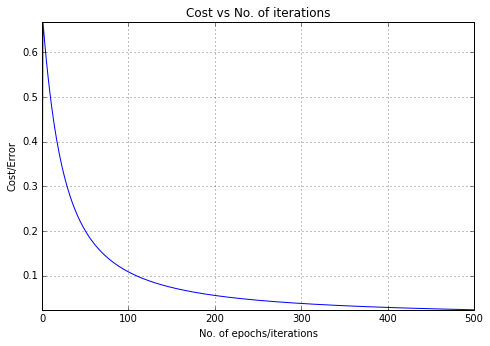

In [140]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlim([0, num_epochs])
ax.set_ylim([np.min(error), np.max(error)])
ax.plot(range(len(error)), error, color='blue');
ax.set_xlabel('No. of epochs/iterations')
ax.set_ylabel('Cost/Error')
ax.set_title('Cost vs No. of iterations')
ax.grid(axis='both')

In [141]:
theta_fit

array([[ -3.83135438e+00],
       [ -2.02060724e-03],
       [ -2.81863026e-02],
       [  3.25882919e-02],
       [ -7.14175925e-02],
       [  6.84629753e-02],
       [ -1.82370842e-02],
       [ -1.72682833e-02],
       [ -6.18274957e-02],
       [ -6.57306379e-03],
       [ -4.13070731e-02],
       [ -8.54345262e-02],
       [  6.45459220e-02],
       [ -1.08650975e-01],
       [ -5.32462588e-03],
       [ -1.45618290e-01],
       [ -2.57162121e-03],
       [ -7.01167285e-02],
       [ -1.05061024e-01],
       [ -3.23881358e-02],
       [  8.38123914e-03],
       [  4.33648005e-03],
       [  1.70138683e-02],
       [  5.21128206e-03],
       [ -3.23453778e-03],
       [ -3.90204694e-03],
       [  2.18918285e-05],
       [  2.99365306e-03],
       [  5.10438439e-03],
       [  3.32265883e-03],
       [  4.10356512e-03]], dtype=float32)

In [142]:
# Make predictions with the parameters theta_fit
predict = np.round(sigmoid(np.matmul(X_test, theta_fit)))

In [143]:
matching_results = np.mean(y_test == predict)

print('Accuracy: %.2f%%' % np.multiply(matching_results, 100))

Accuracy: 99.92%


In [147]:
true_positive = np.sum(np.logical_and((y_test == 1), (predict == 1)))
false_positive = np.sum(np.logical_and((y_test == 0), (predict == 1)))
false_negative = np.sum(np.logical_and((y_test == 1), (predict == 0)))
print('True Positive: %d' % true_positive);
print('False Positive: %d' % false_positive);
print('False Negative: %d' % false_negative);

True Positive: 80
False Positive: 14
False Negative: 56


In [149]:
# Compute Performance Metrics
# Data is highly skewed so Accuracy alone won't help

precision = true_positive / (true_positive + false_positive);
recall = true_positive / (true_positive + false_negative);

F1 = 2 * precision * recall / (precision + recall);

print('Precision: %.4f' % precision);
print('Recall: %.4f' % recall);
print('F1 Score: %.4f' % F1);

Precision: 0.8511
Recall: 0.5882
F1 Score: 0.6957
